In [1]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b

In [2]:
# Required Libraries
import numpy as np
import pandas as pd

In [140]:
df = pd.read_csv('/project/public_grouped.csv')
df.head(3)
df.drop('Unnamed: 0',inplace=True,axis=1)

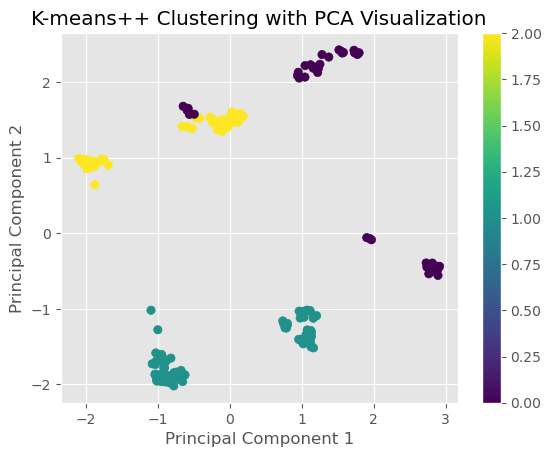

In [121]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Step 2: Apply PCA and reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)
fig, ax = plt.subplots()  # Create a figure and axis
# Step 4: Visualize the clusters on the first 2 principal components
plt.scatter(principal_components[:, 1], principal_components[:, 0], c=clusters,)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means++ Clustering with PCA Visualization')
plt.colorbar()
plt.show()
#fig.savefig('/project/pictures/cluster_full.png')


In [130]:

labels = kmeans.labels_

# Compute Calinski-Harabasz Index
chi_score = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {chi_score}")

Calinski-Harabasz Index: 66.95019686903801


In [141]:
# Convert to array format

arr = df.values
arr

array([[0.01061008, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02387268, 0.        , 0.68117297, ..., 0.66666667, 0.        ,
        0.22222222],
       [0.01591512, 0.        , 0.63758364, ..., 1.        , 0.        ,
        0.25      ],
       ...,
       [0.09018568, 0.        , 0.3995047 , ..., 0.8       , 0.        ,
        0.41666667],
       [0.0530504 , 0.        , 0.2584067 , ..., 1.        , 0.        ,
        0.25      ],
       [0.01856764, 0.        , 0.43608451, ..., 1.        , 0.        ,
        0.41666667]])

In [142]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 5
eta         = 7
mu          = 4
size        = 50
rate        = 0.1
generations = 150
samples     = 0.25

In [143]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [144]:
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'pc')

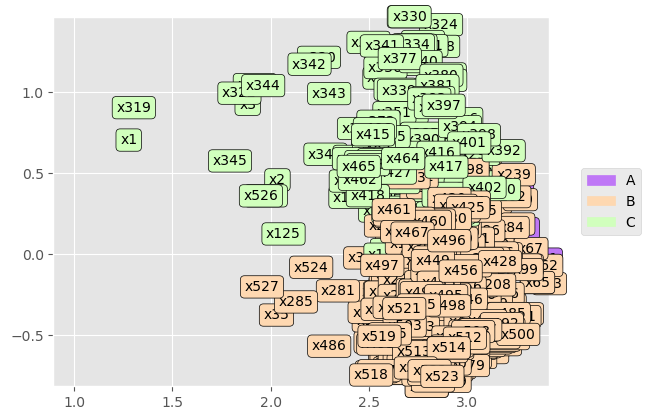

In [145]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [146]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.56 0.45 0.51 0.47 0.44 0.53 0.44 0.66 0.52 0.76 0.56 0.81 0.67 0.61
 0.19 0.59 0.64 0.   0.45 0.6  0.6 ]
Q:  [0.   0.13 0.12 0.02 0.06 0.03 0.1  0.05 0.16 0.01 0.15 0.11 0.03 0.1
 0.05 0.24 0.21 0.   0.13 0.2  0.04]
P:  [0.02 0.32 0.42 0.3  0.1  0.09 0.3  0.06 0.38 0.07 0.2  0.13 0.16 0.32
 0.28 0.29 0.26 0.25 0.36 0.31 0.12]
V:  [0.06 0.77 0.46 0.54 0.44 0.17 0.71 0.18 0.67 0.38 0.45 0.39 0.22 0.66
 0.64 0.61 0.62 0.75 0.81 0.52 0.28]
b1:  [0.   0.63 0.43 0.34 0.52 0.05 0.37 0.02 0.32 0.24 0.66 0.66 0.35 0.56
 0.31 0.86 0.24 0.23 0.51 0.43 0.61]
Lambda Cutoff:  0.65
Accuracy:  0.66
b2:  [0.04 0.77 0.72 0.56 0.7  0.26 0.8  0.12 0.43 0.6  0.8  0.78 0.75 0.81
 0.42 0.95 0.67 0.7  0.66 0.58 0.74]
Lambda Cutoff:  0.65
Accuracy:  0.66


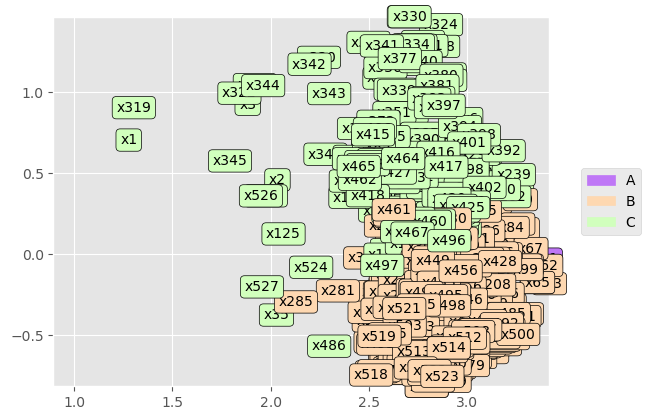

In [147]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(arr, W = w_mean, Q = q_mean, P = p_mean, V = v_mean,
                                   B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True) 

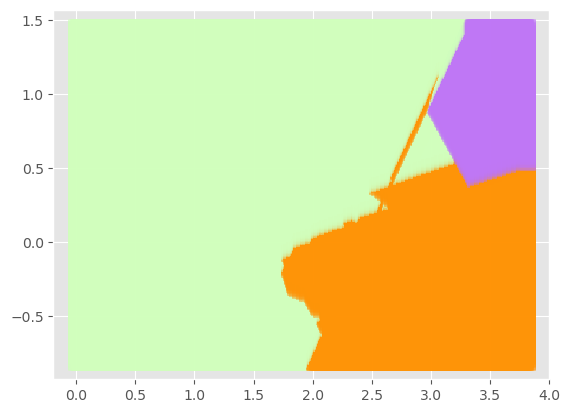

In [148]:
# Plot Tree Model - Decision Boundaries
tree_e_tri_b.plot_decision_boundaries(arr, models)  

In [ ]:
# Plot Mean Model - Decision Boundaries  
model_mean = []
model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
tree_e_tri_b.plot_decision_boundaries(arr, model_mean)